# College players data collection and preparation

## Importing necessary dictionaries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


## Importing college players data to notebook

In [2]:
#creating dataframe from the json file
df = pd.read_json('http://barttorvik.com/getadvstats.php?year=all&specialSource=0&conyes=0&start=-11101&end=all0501&top=0&xvalue=career&page=playerstat.json')


## DF review

In [3]:
df.shape

(70325, 66)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70325 entries, 0 to 70324
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       70325 non-null  object 
 1   1       70325 non-null  object 
 2   2       70325 non-null  object 
 3   3       70325 non-null  int64  
 4   4       70325 non-null  float64
 5   5       70325 non-null  float64
 6   6       70325 non-null  float64
 7   7       70325 non-null  float64
 8   8       70325 non-null  float64
 9   9       70325 non-null  float64
 10  10      70325 non-null  float64
 11  11      70325 non-null  float64
 12  12      70325 non-null  float64
 13  13      70325 non-null  int64  
 14  14      70325 non-null  int64  
 15  15      70325 non-null  float64
 16  16      70325 non-null  int64  
 17  17      70325 non-null  int64  
 18  18      70325 non-null  float64
 19  19      70325 non-null  int64  
 20  20      70325 non-null  int64  
 21  21      70325 non-null  float64
 22

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,Jason Praet,Detroit,Horz,6,1.0,0.0,16.8,0.0,0.00,0.0,...,-1.499380,0.1429,0.1429,0.2857,0.0000,0.2857,0.0000,0.0000,None,5.70546
1,DeAndrae Ross,South Alabama,SB,22,8.4,62.0,14.1,32.6,33.40,0.0,...,-1.912160,0.0000,0.3333,0.3333,0.2083,0.0833,0.0000,0.7500,None,6.20657
2,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,None,6.22026
3,DeAndrae Ross,Troy,SB,7,11.5,67.1,16.9,34.5,36.11,3.1,...,-3.886670,0.5714,1.1429,1.7143,1.4286,0.1429,0.0000,3.2857,Wing G,7.67089
4,Pooh Williams,Utah St.,WAC,28,24.3,93.1,13.8,45.2,46.20,1.4,...,-0.713339,0.1379,0.6897,0.8276,1.0000,0.3793,0.0690,2.4483,None,4.26818


## Data wrangling/cleaning

In [6]:
# adding column headers based on https://www.dropbox.com/s/ryugeykvntto5ji/pstatheaders.xlsx?dl=0

new_columns = {0: 'player_name', 1: 'school', 2: 'conference', 3: 'GP', 4: 'Min_per',
               5: 'ORtg', 6: 'usg', 7: 'eFG', 8: 'TS_per', 9: 'ORB_per', 10: 'DRB_per',
              11: 'AST_per', 12: 'TO_per', 13: 'FTM', 14: 'FTA', 15: 'FT_per',16: 'twoPM',
              17: 'twoPA', 18: 'twoP_per', 19: 'TPM', 20: 'TPA', 21: 'TP_per', 22: 'blk_per',
              23: 'stl_per', 24: 'ftr', 25: 'yr', 26: 'ht', 27: 'num', 28: 'porpag', 29: 'adjoe',
              30: 'pfr', 31: 'year', 32: 'pid', 33: 'type', 34: 'rec-rk', 35: 'ast/tov', 36: 'rimmade',
              37: 'rimmade + rimmiss', 38: 'midmade', 39: 'midmade + midmiss', 40: 'rimmade/(rimmade+rimmiss)',
              41: 'midmade/(midmade+mismiss)', 42: 'dunksmade', 43: 'dunksmiss + dunksmade', 
              44: 'dunksmade/(dunksmade+dunksmiss)', 45: 'pick', 46: 'drtg', 47: 'adrtg', 48: 'dporpag',
              49: 'stops', 50: 'bpm', 51: 'obpm', 52: 'dbpm', 53: 'gbpm', 54: 'mp', 55: 'ogbpm', 56: 'dgbpm',
               57: 'oreb', 58: 'dreb', 59: 'treb', 60: 'ast', 61: 'stl', 62: 'blk', 63: 'pts', 64: 'role',}

In [7]:
# renaming columns
df = df.rename(columns = new_columns)

In [8]:
df.head()

,player_name,school,conference,GP,Min_per,ORtg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role,65
0,Jason Praet,Detroit,Horz,6,1.0,0.0,16.8,0.0,0.00,0.0,...,-1.499380,0.1429,0.1429,0.2857,0.0000,0.2857,0.0000,0.0000,None,5.70546
1,DeAndrae Ross,South Alabama,SB,22,8.4,62.0,14.1,32.6,33.40,0.0,...,-1.912160,0.0000,0.3333,0.3333,0.2083,0.0833,0.0000,0.7500,None,6.20657
2,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,None,6.22026
3,DeAndrae Ross,Troy,SB,7,11.5,67.1,16.9,34.5,36.11,3.1,...,-3.886670,0.5714,1.1429,1.7143,1.4286,0.1429,0.0000,3.2857,Wing G,7.67089
4,Pooh Williams,Utah St.,WAC,28,24.3,93.1,13.8,45.2,46.20,1.4,...,-0.713339,0.1379,0.6897,0.8276,1.0000,0.3793,0.0690,2.4483,None,4.26818


### Adjusting college columns

In [9]:
# data includes individual seasons
df[df['player_name'] == "C.J. McCollum"]

,player_name,school,conference,GP,Min_per,ORtg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role,65
19822,C.J. McCollum,Lehigh,Pat,33,79.1,115.6,27.0,54.1,59.33,5.1,...,-0.500785,1.3939,3.6061,5.0000,2.3939,1.3030,0.2121,19.1212,Wing G,9.24141
19823,C.J. McCollum,Lehigh,Pat,31,85.2,104.2,32.1,44.7,52.26,6.1,...,1.080930,1.9032,5.9032,7.8065,2.1613,2.4839,0.6774,21.8387,Wing G,8.67357
19824,C.J. McCollum,Lehigh,Pat,34,83.6,114.5,32.7,49.9,55.93,5.0,...,3.551880,1.4706,5.0882,6.5588,3.5294,2.6176,0.5588,22.3529,Combo G,8.79588
19825,C.J. McCollum,Lehigh,Pat,12,31.0,115.7,35.0,58.0,62.75,4.0,...,0.279008,1.0000,4.0000,5.0000,2.9167,1.4167,0.3333,23.9167,Combo G,10.32070


In [10]:
# understanding order before dropping repeated player name columns
# USA college year order 1-freshman, 2-sophomore, 3-junior, 4-senior

df.loc[df.player_name == 'C.J. McCollum', 'yr'] 

19822    Fr
19823    So
19824    Jr
19825    Sr
Name: yr, dtype: object

In [11]:
# drop repeated player_name values, keep max college year value

df_freedups=df.drop_duplicates(subset=['player_name'], keep='last')

In [12]:
# checking new df without dups
df_freedups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28557 entries, 0 to 70324
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      28557 non-null  object 
 1   school                           28557 non-null  object 
 2   conference                       28557 non-null  object 
 3   GP                               28557 non-null  int64  
 4   Min_per                          28557 non-null  float64
 5   ORtg                             28557 non-null  float64
 6   usg                              28557 non-null  float64
 7   eFG                              28557 non-null  float64
 8   TS_per                           28557 non-null  float64
 9   ORB_per                          28557 non-null  float64
 10  DRB_per                          28557 non-null  float64
 11  AST_per                          28557 non-null  float64
 12  TO_per            

In [13]:
#validating changes

df_freedups.loc[df_freedups.player_name == 'C.J. McCollum', 'yr'] 

19825    Sr
Name: yr, dtype: object

In [14]:
df_freedups['yr'].value_counts()

Sr      14496
Jr       5052
Fr       4512
So       4275
N/A       186
None       18
0           3
Name: yr, dtype: int64

In [15]:
df_freedups.drop(df_freedups.loc[df_freedups['yr']=='None'].index, inplace=True)

/Users/polferrandis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
df_freedups.drop(df_freedups.loc[df_freedups['yr']=='N/A'].index, inplace=True)

In [17]:
df_freedups.drop(df_freedups.loc[df_freedups['yr']==0].index, inplace=True)

In [18]:
df_freedups['yr'].value_counts()

Sr    14496
Jr     5052
Fr     4512
So     4275
Name: yr, dtype: int64

Adjusting Yr Column

Currently the yr column lists a player as Freshman, Sophomore, Junior or Senior depending on what grade the player was in. We are going to adjust this column so that each grade corresponds to a value which will represent the number of years the player played in college.

In [19]:
# asign numerical value to college year

def college_year_num(df_freedups):
    
    if (df_freedups['yr'] == 'Fr'):
        return '1'
    elif (df_freedups['yr'] == 'So'):
        return '2'
    elif (df_freedups['yr'] == 'Jr'):
        return '3'
    elif (df_freedups['yr'] == 'Sr'):
        return '4'
    else:
        return 'null'
    
df_freedups['yr'] = df_freedups.apply(college_year_num, axis = 1)

/var/folders/gd/t7jqq6zs1zl6b6b62cxdkccw0000gn/T/ipykernel_13934/645909953.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freedups['yr'] = df_freedups.apply(college_year_num, axis = 1)


In [20]:
df_freedups['yr'].value_counts()

4       14496
3        5052
1        4512
2        4275
null       15
Name: yr, dtype: int64

In [21]:
df_freedups.drop(df_freedups.loc[df_freedups['yr']=='null'].index, inplace=True)

In [22]:
#restart index

df_freedups=df_freedups.reset_index(drop=True)

In [23]:
# before dropping nulls, we will replace null values from 'pick' column to value '0' for undrafted players

df_freedups.pick.fillna(0,inplace=True)

In [24]:
df_freedups.head()

,player_name,school,conference,GP,Min_per,ORtg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role,65
0,Jason Praet,Detroit,Horz,6,1.0,0.0,16.8,0.0,0.00,0.0,...,-1.499380,0.1429,0.1429,0.2857,0.0000,0.2857,0.0000,0.0000,None,5.70546
1,DeAndrae Ross,Troy,SB,7,11.5,67.1,16.9,34.5,36.11,3.1,...,-3.886670,0.5714,1.1429,1.7143,1.4286,0.1429,0.0000,3.2857,Wing G,7.67089
2,Pooh Williams,Utah St.,WAC,33,64.5,105.6,18.7,48.1,52.40,0.8,...,0.685989,0.1515,1.4848,1.6364,2.0909,0.2121,0.0909,8.6667,Combo G,9.66297
3,Mohamed Tangara,Arizona,P10,6,1.0,15.8,18.4,0.0,0.00,9.7,...,-1.825010,0.1667,0.0000,0.1667,0.0000,0.0000,0.1667,0.0000,None,4.60267
4,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,None,10.92680


## Feature engineering

As I look into what features will be using to for the model 1, I have decided to create 1 more columns that will later on define the target variable for this model:

-Drafted = Yes/No


In [25]:
df_freedups['pick'].unique()

array([ 0., 44., 49., 52., 54., 48., 40., 57., 33., 21., 55., 20., 50.,
       14., 58., 38., 28., 32.,  9., 11., 24., 13., 46., 59., 26., 51.,
       30., 37., 27.,  7., 39., 10., 15., 16., 35., 22., 19., 56., 23.,
        2., 12., 29.,  6.,  8., 25., 18., 60., 36., 34.,  1., 42.,  4.,
       17.,  5., 45.,  3., 41., 47., 43., 53., 31.])

### creating column for drafted/undrafted players

In [26]:

def drafted_undrafted(df_freedups):
    
    if (df_freedups['pick'] > 0):
        return 'Yes'
    else: 
        return 'No'
    
df_freedups['drafted'] = df_freedups.apply(drafted_undrafted, axis = 1)


In [27]:
df_freedups['drafted'].unique()

array(['No', 'Yes'], dtype=object)

### dropping first columns to create a clean df

I have decided to keep a combination of conventional stats with advanced stats:

'player_name','school','GP','Min_per','ORtg','usg','eFG','TS_per','FT_per','twoP_per','TP_per','yr','ht','ast/tov','pick','drtg','bpm','mp','oreb','dreb','ast','stl','blk','pts','role,''drafted'

In [28]:
# dropping columns

df_freedups_filt=df_freedups.filter(items=['player_name','school','GP','Min_per','ORtg','usg','eFG','TS_per','FT_per','twoP_per','TP_per','yr','ht','ast/tov','pick','drtg','bpm','mp','oreb','dreb','ast','stl','blk','pts','role','drafted'])
                 
                 

In [29]:
df_freedups_filt.head()

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,bpm,mp,oreb,dreb,ast,stl,blk,pts,role,drafted
0,Jason Praet,Detroit,6,1.0,0.0,16.8,0.0,0.00,0.000,0.000,...,-16.030800,2.0000,0.1429,0.1429,0.0000,0.2857,0.0000,0.0000,None,No
1,DeAndrae Ross,Troy,7,11.5,67.1,16.9,34.5,36.11,0.500,0.364,...,-10.394000,18.8571,0.5714,1.1429,1.4286,0.1429,0.0000,3.2857,Wing G,No
2,Pooh Williams,Utah St.,33,64.5,105.6,18.7,48.1,52.40,0.815,0.394,...,1.125160,26.0000,0.1515,1.4848,2.0909,0.2121,0.0909,8.6667,Combo G,No
3,Mohamed Tangara,Arizona,6,1.0,15.8,18.4,0.0,0.00,0.000,0.000,...,-12.228400,2.3333,0.1667,0.0000,0.0000,0.0000,0.1667,0.0000,None,No
4,Jesus Verdejo,South Florida,27,72.0,96.2,21.8,45.7,47.98,0.672,0.427,...,0.003161,33.1852,0.6296,2.3333,1.9630,0.4815,0.0000,12.1852,None,No


In [30]:
df_freedups_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28335 entries, 0 to 28334
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  28335 non-null  object 
 1   school       28335 non-null  object 
 2   GP           28335 non-null  int64  
 3   Min_per      28335 non-null  float64
 4   ORtg         28335 non-null  float64
 5   usg          28335 non-null  float64
 6   eFG          28335 non-null  float64
 7   TS_per       28335 non-null  float64
 8   FT_per       28335 non-null  float64
 9   twoP_per     28335 non-null  float64
 10  TP_per       28335 non-null  float64
 11  yr           28335 non-null  object 
 12  ht           28288 non-null  object 
 13  ast/tov      25510 non-null  float64
 14  pick         28335 non-null  float64
 15  drtg         28335 non-null  float64
 16  bpm          28335 non-null  float64
 17  mp           28334 non-null  float64
 18  oreb         28334 non-null  float64
 19  dreb

In [31]:
df_freedups_filt=df_freedups_filt.dropna()

In [32]:
df_freedups_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22489 entries, 1 to 28330
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  22489 non-null  object 
 1   school       22489 non-null  object 
 2   GP           22489 non-null  int64  
 3   Min_per      22489 non-null  float64
 4   ORtg         22489 non-null  float64
 5   usg          22489 non-null  float64
 6   eFG          22489 non-null  float64
 7   TS_per       22489 non-null  float64
 8   FT_per       22489 non-null  float64
 9   twoP_per     22489 non-null  float64
 10  TP_per       22489 non-null  float64
 11  yr           22489 non-null  object 
 12  ht           22489 non-null  object 
 13  ast/tov      22489 non-null  float64
 14  pick         22489 non-null  float64
 15  drtg         22489 non-null  float64
 16  bpm          22489 non-null  float64
 17  mp           22489 non-null  float64
 18  oreb         22489 non-null  float64
 19  dreb

### cleaning height column and turning it to a numeric value 

In [33]:
df_freedups_filt['ht'].value_counts()

6-7     2277
6-4     2205
6-5     2198
6-8     2183
6-6     2112
6-3     2032
6-2     1819
6-9     1654
6-1     1372
6-0     1183
6-10    1042
5-11     564
5-10     531
6-11     495
7-0      287
5-9      228
7-1       97
5-8       85
7-2       39
5-7       35
7-3       15
5-6       10
7-4        9
4-0        5
7-5        3
5-5        2
None       2
5-4        1
-          1
7-6        1
6'4        1
5-2        1
Name: ht, dtype: int64

In [34]:
# will drop the values that are missing a real value for height  

df_freedups_filt[df_freedups_filt['ht']=='None']

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,bpm,mp,oreb,dreb,ast,stl,blk,pts,role,drafted
27238,Isaiah Williams,Jackson St.,12,38.8,72.2,20.8,29.7,36.98,0.537,0.302,...,-6.85845,23.5833,1.6667,3.5000,0.6667,0.9167,0.1667,5.8333,Wing G,No
27239,Justin Thomas,Alcorn St.,9,30.8,62.0,16.3,24.0,29.51,0.625,0.255,...,-8.20410,26.0000,0.1111,2.7778,2.5556,1.0000,0.2222,3.7778,Combo G,No


In [35]:
df_freedups_filt.drop(df_freedups_filt.loc[df_freedups_filt['ht']=='None'].index, inplace=True)

In [36]:
df_freedups_filt.drop(df_freedups_filt.loc[df_freedups_filt['ht']=='So'].index, inplace=True)

In [37]:
df_freedups_filt.drop(df_freedups_filt.loc[df_freedups_filt['ht']=='0'].index, inplace=True)

In [38]:
df_freedups_filt.drop(df_freedups_filt.loc[df_freedups_filt['ht']=='-'].index, inplace=True)

In [39]:
df_freedups_filt.drop(df_freedups_filt.loc[df_freedups_filt['ht']==0].index, inplace=True)

In [40]:
df_freedups_filt.drop(df_freedups_filt.loc[df_freedups_filt['ht']=="6'4"].index, inplace=True)

Height column is currently a string, will turn the column into an integer equal to height in inches first and later to cm.

In [41]:
#turning height columns to inches
df_freedups_filt['ht'] = df_freedups_filt['ht'].str.replace('-', '').map(lambda x: (int(x[0]) * 12) + int(x[1:]))

In [42]:
df_freedups_filt['ht'] = df_freedups_filt['ht'].astype(int)

In [43]:
df_freedups_filt['ht'].dtype

dtype('int64')

In [44]:
df_freedups_filt['ht'].value_counts()

79    2277
76    2205
77    2198
80    2183
78    2112
75    2032
74    1819
81    1654
73    1372
72    1183
82    1042
71     564
70     531
83     495
84     287
69     228
85      97
68      85
86      39
67      35
87      15
66      10
88       9
48       5
89       3
65       2
64       1
90       1
62       1
Name: ht, dtype: int64

In [45]:
#turning height column to cm
df_freedups_filt["ht"] = 2.54 * df_freedups_filt["ht"]

In [46]:
df_freedups_filt['ht'].value_counts()

200.66    2277
193.04    2205
195.58    2198
203.20    2183
198.12    2112
190.50    2032
187.96    1819
205.74    1654
185.42    1372
182.88    1183
208.28    1042
180.34     564
177.80     531
210.82     495
213.36     287
175.26     228
215.90      97
172.72      85
218.44      39
170.18      35
220.98      15
167.64      10
223.52       9
121.92       5
226.06       3
165.10       2
162.56       1
228.60       1
157.48       1
Name: ht, dtype: int64

In [47]:
df_freedups_filt['ht'] = df_freedups_filt['ht'].astype(int)

In [48]:
df_freedups_filt['ht'].value_counts()

200    2277
193    2205
195    2198
203    2183
198    2112
190    2032
187    1819
205    1654
185    1372
182    1183
208    1042
180     564
177     531
210     495
213     287
175     228
215      97
172      85
218      39
170      35
220      15
167      10
223       9
121       5
226       3
165       2
162       1
228       1
157       1
Name: ht, dtype: int64

In [49]:
df_freedups_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22485 entries, 1 to 28330
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  22485 non-null  object 
 1   school       22485 non-null  object 
 2   GP           22485 non-null  int64  
 3   Min_per      22485 non-null  float64
 4   ORtg         22485 non-null  float64
 5   usg          22485 non-null  float64
 6   eFG          22485 non-null  float64
 7   TS_per       22485 non-null  float64
 8   FT_per       22485 non-null  float64
 9   twoP_per     22485 non-null  float64
 10  TP_per       22485 non-null  float64
 11  yr           22485 non-null  object 
 12  ht           22485 non-null  int64  
 13  ast/tov      22485 non-null  float64
 14  pick         22485 non-null  float64
 15  drtg         22485 non-null  float64
 16  bpm          22485 non-null  float64
 17  mp           22485 non-null  float64
 18  oreb         22485 non-null  float64
 19  dreb

### Limit Min_per

Some of our advanced statistical features seem to be altered and non realistic. In order to gain accuracy will drop players with less than 5.0 Min_per

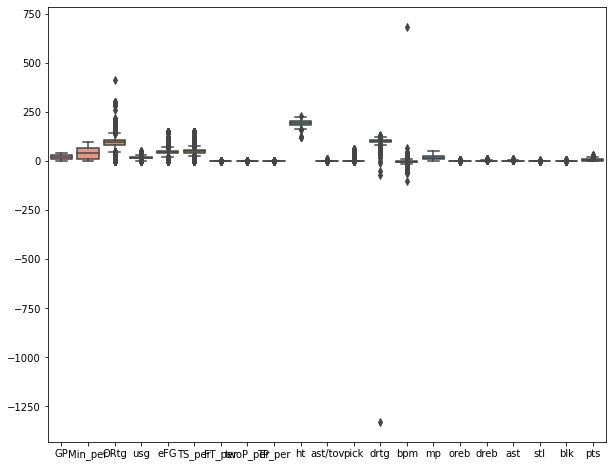

In [50]:
# check for unrealistic outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df_freedups_filt);

In [51]:
index_names = df_freedups_filt[ df_freedups_filt['Min_per'] < 5.0].index

In [52]:
df_freedups_filt.drop(index_names, inplace = True)

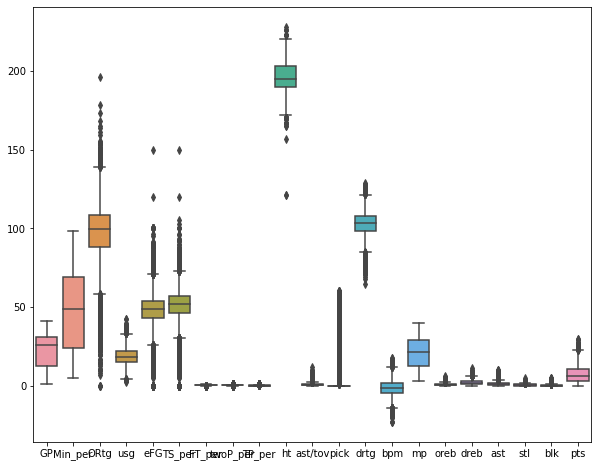

In [53]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_freedups_filt);

## df to csv for exploratory data analysis in tableau


In [54]:
df_freedups_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 1 to 28325
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  19087 non-null  object 
 1   school       19087 non-null  object 
 2   GP           19087 non-null  int64  
 3   Min_per      19087 non-null  float64
 4   ORtg         19087 non-null  float64
 5   usg          19087 non-null  float64
 6   eFG          19087 non-null  float64
 7   TS_per       19087 non-null  float64
 8   FT_per       19087 non-null  float64
 9   twoP_per     19087 non-null  float64
 10  TP_per       19087 non-null  float64
 11  yr           19087 non-null  object 
 12  ht           19087 non-null  int64  
 13  ast/tov      19087 non-null  float64
 14  pick         19087 non-null  float64
 15  drtg         19087 non-null  float64
 16  bpm          19087 non-null  float64
 17  mp           19087 non-null  float64
 18  oreb         19087 non-null  float64
 19  dreb

In [55]:
df_freedups_filt['role'].value_counts()

Wing G        4529
Combo G       3340
C             2673
PF/C          2608
Scoring PG    2074
Wing F        1924
Stretch 4     1228
Pure PG        711
Name: role, dtype: int64

In [57]:
df_freedups_filt.to_csv('college_data.csv')